# **PROJECT OBJECTIVE**: 
We will build a recommendation system using popularity based and collaborative filtering methods to recommend
mobile phones to a user which are most popular and personalised respectively..

# **CONTEXT:** 
India is the second largest market globally for smartphones after China. About 134 million smartphones were sold across India
in the year 2017 and is estimated to increase to about 442 million in 2022. India ranked second in the average time spent on mobile web by
smartphone users across Asia Pacific. The combination of very high sales volumes and the average smartphone consumer behaviour has
made India a very attractive market for foreign vendors. As per Consumer behaviour, 97% of consumers turn to a search engine when they
are buying a product vs. 15% who turn to social media. If a seller succeeds to publish smartphones based on user’s behaviour/choice at the
right place, there are 90% chances that user will enquire for the same.

`This Case Study is targeted to build a recommendation system based on individual consumer’s behaviour or choice.`

# **DATA DESCRIPTION:**
- author : name of the person who gave the rating
- country : country the person who gave the rating belongs to
- data : date of the rating
- domain: website from which the rating was taken from
- extract: rating content
- language: language in which the rating was given
- product: name of the product/mobile phone for which the rating was given
- score: average rating for the phone
- score_max: highest rating given for the phone
- source: source from where the rating was taken

# <a id='importing'>Importing the necessary libraries</a> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import glob
from sklearn.preprocessing import LabelEncoder
from zipfile import ZipFile

import math
import json
import time
# import sklearn.external.joblib as extjoblib
import joblib
from sklearn.metrics.pairwise import cosine_similarity
#from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import seaborn as sns
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy

from scipy.spatial.distance import correlation, cosine
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.metrics import pairwise_distances
from sklearn.metrics import mean_squared_error
from math import sqrt
import sys, os
from contextlib import contextmanager
# filterwarnings to ignore all unnecessary warnings and logs
import warnings
warnings.filterwarnings('ignore')
#declaring metric as global which can be changed by the user later
global metric
metric='cosine'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from collections import defaultdict
from surprise.model_selection import KFold

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go

from surprise import Dataset,Reader
from surprise import NormalPredictor
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split

# <a id='reading'>Reading the dataset </a>

In [3]:
# Import the dataset and give the column names
# columns=['phone_url','date','lang','country','source','domain','score','score_max','extract','author','product']
phone_user_review1_df=pd.read_csv("D:/Datasets/smart-phone-recommendation-system-checkpoint-checkpoint-v-1/phone_user_review_file_1.csv",encoding='latin-1')
phone_user_review2_df=pd.read_csv('D:/Datasets/smart-phone-recommendation-system-checkpoint-checkpoint-v-1/phone_user_review_file_2.csv',encoding='latin-1')
phone_user_review3_df=pd.read_csv('D:/Datasets/smart-phone-recommendation-system-checkpoint-checkpoint-v-1/phone_user_review_file_3.csv',encoding='latin-1')
phone_user_review4_df=pd.read_csv('D:/Datasets/smart-phone-recommendation-system-checkpoint-checkpoint-v-1/phone_user_review_file_4.csv',encoding='latin-1')
phone_user_review5_df=pd.read_csv('D:/Datasets/smart-phone-recommendation-system-checkpoint-checkpoint-v-1/phone_user_review_file_5.csv',encoding='latin-1')
phone_user_review6_df=pd.read_csv('D:/Datasets/smart-phone-recommendation-system-checkpoint-checkpoint-v-1/phone_user_review_file_6.csv',encoding='latin-1')
# Concatenating dataframes without duplicates 
combined_phone_user_review_df = pd.concat([phone_user_review1_df
                                           ,phone_user_review2_df, phone_user_review3_df, 
                                           phone_user_review4_df, phone_user_review5_df,phone_user_review6_df
                                          ]).drop_duplicates() 


In [4]:
combined_phone_user_review_df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.0,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,/cellphones/samsung-galaxy-s8/,5/4/2017,en,us,Amazon,amazon.com,6.0,10.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Samsung,samsung.com,9.2,10.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,/cellphones/samsung-galaxy-s8/,5/11/2017,en,us,Verizon Wireless,verizonwireless.com,4.0,10.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8


In [5]:
from colorama import Fore, Back, Style
rows, columns = combined_phone_user_review_df.shape
print(Fore.YELLOW + "No of rows: ", Style.RESET_ALL,rows) 
print(Fore.YELLOW + "No of columns: ", Style.RESET_ALL,columns) 

No of rows:   1408721
No of columns:   11


In [6]:
# Keep only 1000000 data samples. Use random state=612
sample_df = combined_phone_user_review_df.sample(n = 100000, random_state = 612) 

In [7]:
sample_df.head()

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
347247,/cellphones/nokia-6301/,2/21/2011,en,gb,Dooyoo,dooyoo.co.uk,10.0,10.0,This phone has lasted the test of time and has...,gilay28,Nokia 6301
80368,/cellphones/apple-iphone-4s/,13/1/2012,en,us,Amazon,amazon.com,10.0,10.0,"For years, I've been using Android phones. Fro...",Stacy G.,"Apple iPhone 4S Verizon Cellphone, 16GB, White"
46940,/cellphones/samsung-galaxy-note-3-neo-4g-n7505/,8/21/2014,de,de,Amazon,amazon.de,10.0,10.0,Habe mir das Samsung Galaxy Note 3 Neo als Nac...,BulldoZer,"Samsung Galaxy Note 3 Neo Smartphone (13,94 cm..."
283355,/cellphones/nokia-5030/,4/12/2010,en,us,HandCellPhone,handcellphone.com,6.0,10.0,nokia 5030 me game kesa dalay,vinod kumar,Nokia 5030
61365,/cellphones/huawei-p9-plus/,8/2/2016,it,it,Amazon,amazon.it,10.0,10.0,"Beh, dopo Iphone e Lumia sono passato al mondo...",Giorgio,"Huawei P9 Plus Smartphone, LTE, Display 5.5'' ..."


In [8]:
rows, columns = sample_df.shape
print(Fore.YELLOW + "No of rows: ", Style.RESET_ALL,rows) 
print(Fore.YELLOW + "No of columns: ", Style.RESET_ALL,columns) 

No of rows:   100000
No of columns:   11


In [9]:
# It is very important to check and remove data duplicates. 
# Else our model may break or report overly optimistic / pessimistic performance results
dupes=sample_df.duplicated()
print(' The number of duplicates in the dataset are:',sum(dupes), '\n')
dupes_record=pd.DataFrame(sample_df[dupes])
print(' The duplicate observations are:') 
dupes_record

 The number of duplicates in the dataset are: 0 

 The duplicate observations are:


,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product


In [10]:
# After dropping duplicates
sample_df.drop_duplicates(keep="first")
rows, columns = sample_df.shape
print(Fore.YELLOW + "No of rows: ", Style.RESET_ALL,rows) 
print(Fore.YELLOW + "No of columns: ", Style.RESET_ALL,columns)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
347247,/cellphones/nokia-6301/,2/21/2011,en,gb,Dooyoo,dooyoo.co.uk,10.0,10.0,This phone has lasted the test of time and has...,gilay28,Nokia 6301
80368,/cellphones/apple-iphone-4s/,13/1/2012,en,us,Amazon,amazon.com,10.0,10.0,"For years, I've been using Android phones. Fro...",Stacy G.,"Apple iPhone 4S Verizon Cellphone, 16GB, White"
46940,/cellphones/samsung-galaxy-note-3-neo-4g-n7505/,8/21/2014,de,de,Amazon,amazon.de,10.0,10.0,Habe mir das Samsung Galaxy Note 3 Neo als Nac...,BulldoZer,"Samsung Galaxy Note 3 Neo Smartphone (13,94 cm..."
283355,/cellphones/nokia-5030/,4/12/2010,en,us,HandCellPhone,handcellphone.com,6.0,10.0,nokia 5030 me game kesa dalay,vinod kumar,Nokia 5030
61365,/cellphones/huawei-p9-plus/,8/2/2016,it,it,Amazon,amazon.it,10.0,10.0,"Beh, dopo Iphone e Lumia sono passato al mondo...",Giorgio,"Huawei P9 Plus Smartphone, LTE, Display 5.5'' ..."
...,...,...,...,...,...,...,...,...,...,...,...
193823,/cellphones/samsung-galaxy-3-i5800/,1/29/2011,de,de,Amazon,amazon.de,10.0,10.0,Ich besitze das gute StÃ¼ck nun seit etwa eine...,Martin S.,Samsung Galaxy 3 i5800 Smartphone (Touchscreen...
182982,/cellphones/nokia-e72/,7/24/2010,pt,br,MercadoLibre,opiniao.mercadolivre.com.br,10.0,10.0,"Ã um excelente aparelho, para quem partiu do E71",NANZINHO_SHOP,Nokia E72
318112,/cellphones/cubot-note-s/,4/25/2016,es,es,Amazon,amazon.es,10.0,10.0,Muy buena calidad precio. La pantalla es mas q...,Violeta Basanta,Cubot Note S - Smartphone 3G Libre Android 5.1...
338328,/cellphones/vodafone-smart-first-6/,9/21/2015,en,gb,Amazon,amazon.co.uk,10.0,10.0,Excellent value for money,Natasha stuart,Vodafone Smart First 6 Pay As You Go Handset S...


No of rows:   100000
No of columns:   11


# <a id='basic'>Basic Data Exploration </a> 

In [11]:
#Check Data types
sample_df.dtypes

phone_url     object
date          object
lang          object
country       object
source        object
domain        object
score        float64
score_max    float64
extract       object
author        object
product       object
dtype: object

In [12]:
# Datetime conversion using astype for date column:
sample_df['date'] = sample_df['date'].astype('datetime64[ns]')

In [13]:
# Datetime conversion using astype for date column:
# sample_df['score'] = pd.to_numeric(sample_df['score'])
sample_df['score'] = sample_df['score'].round().astype('Int64')

In [14]:
# Datetime conversion using astype for date column:
# sample_df['score_max'] = pd.to_numeric(sample_df['score_max'])
sample_df['score_max'] = sample_df['score_max'].round().astype('Int64')

In [15]:
#Again check Data types
sample_df.dtypes

phone_url            object
date         datetime64[ns]
lang                 object
country              object
source               object
domain               object
score                 Int64
score_max             Int64
extract              object
author               object
product              object
dtype: object

## Categorical & Numerical Columns

In [16]:
def cols():
    cat_cols = [col for col in sample_df.columns if sample_df[col].dtypes == "O"]
    if len(cat_cols) == 0:
        print("There is no Categorical Column")
    else:
        print("Number of Categorical Column: ", len(cat_cols),"\n",cat_cols)
    
    num_cols = [col for col in sample_df.columns if sample_df[col].dtypes != "O"]
    if len(num_cols) == 0:
        print("There is no Numerical Column")
    print("Number of Numerical Columns: ", len(num_cols),"\n",num_cols)
cols()

Number of Categorical Column:  8 
 ['phone_url', 'lang', 'country', 'source', 'domain', 'extract', 'author', 'product']
Number of Numerical Columns:  3 
 ['date', 'score', 'score_max']


In [17]:
# Dropping less relevent columns
''' dropping multiple column based on name'''
sample_df.drop(['phone_url', 'extract', 'domain', 'date','lang', 'country', 'source'], axis = 1,inplace = True)


' dropping multiple column based on name'

In [18]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 347247 to 161884
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   score      95474 non-null   Int64 
 1   score_max  95474 non-null   Int64 
 2   author     95580 non-null   object
 3   product    100000 non-null  object
dtypes: Int64(2), object(2)
memory usage: 4.0+ MB


## Checking missing values

In [19]:
#display in each column how many null values are there
sample_df.apply(lambda x: sum(x.isnull()))

score        4526
score_max    4526
author       4420
product         0
dtype: int64

In [20]:
# determine the threshold for missing values
def missing_info(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA     

In [21]:
df_NA = missing_info(sample_df)
df_NA

,Number of NA,Percent NA
score,4526,4.53
score_max,4526,4.53
author,4420,4.42


In [22]:
# Code to get number of categories in missing value columns
print("Number of Categories in: ")
for ColName in sample_df[['author','product']]:
    print("{} = {}".format(ColName,       len(sample_df[ColName].unique())))

Number of Categories in: 
author = 73265
product = 26363


### Impute / Replace Missing Values with Median

In [23]:
# imputing missing data with median value can only be done with numerical data.
sample_df['score'].fillna(sample_df['score'].median(), inplace = True)

In [24]:
# imputing missing data with median value can only be done with numerical data.
sample_df['score_max'].fillna(sample_df['score_max'].median(), inplace = True)

In [25]:
sample_df['author'].fillna(sample_df['author'].mode()[0], inplace = True)

In [26]:
sample_df['product'].fillna(sample_df['product'].mode()[0], inplace = True)

In [27]:
df_NA = missing_info(sample_df)
df_NA

,Number of NA,Percent NA


In [28]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 347247 to 161884
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   score      100000 non-null  Int64 
 1   score_max  100000 non-null  Int64 
 2   author     100000 non-null  object
 3   product    100000 non-null  object
dtypes: Int64(2), object(2)
memory usage: 4.0+ MB


## Univariate Analysis¶

**As rule of thumb, skewness can be interpreted like this:**

`Skewness`
- Fairly Symmetrical	-0.5 to 0.5
- Moderate Skewed	-0.5 to -1.0 and 0.5 to 1.0
- Highly Skewed	< -1.0 and > 1.0

In [29]:
# skewness along the index axis 
sample_df.skew(axis = 0, skipna = True) 

score       -1.304861
score_max    0.000000
dtype: float64

In [30]:
# skewness along the index axis 
sample_df.kurt(axis = 0, skipna = True) 

score        0.515919
score_max    0.000000
dtype: float64

<AxesSubplot:xlabel='score', ylabel='Density'>

<AxesSubplot:xlabel='score_max', ylabel='Density'>

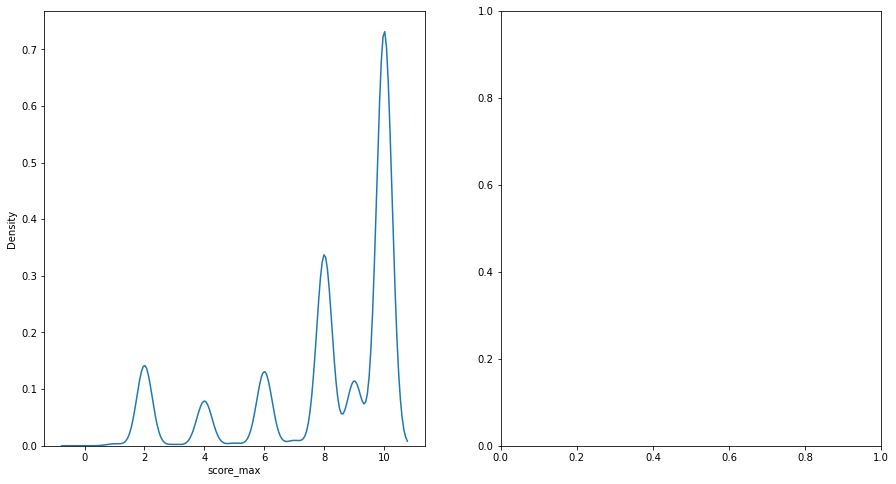

score       -1.304861
score_max    0.000000
dtype: float64


In [31]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
sns.distplot(sample_df['score'],ax=ax[0],kde=True,hist=False)
sns.distplot(sample_df['score_max'],ax=ax[0],kde=True,hist=False)
plt.show()
print(sample_df.skew())

In [32]:
print(sample_df['score'].astype(float).skew())
print(sample_df['score'].astype(float).kurt())

-1.3048606641435783
0.5159186064746035


In [33]:
print(sample_df['score_max'].astype(float).skew())
print(sample_df['score_max'].astype(float).kurt())

0
0


In [34]:
#display 5 point summary of dataframe [0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
sample_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score,100000.0,8.05645,2.563577,0.0,8.0,9.0,10.0,10.0
score_max,100000.0,10.00000,0.000000,10.0,10.0,10.0,10.0,10.0


In [35]:
sample_df.score.value_counts()

10    47061
8     21690
2      9121
6      8429
9      7330
4      5082
7       601
5       302
1       228
3       152
0         4
Name: score, dtype: Int64

In [36]:
# Summary statistics of 'rating' variable[0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
sample_df['score'].describe().transpose()

count    100000.000000
mean          8.056450
std           2.563577
min           0.000000
25%           8.000000
50%           9.000000
75%          10.000000
max          10.000000
Name: score, dtype: float64

In [37]:
# find minimum and maximum ratings
print('The minimum score is: %d' %(sample_df['score'].min()))
print('The maximum score is: %d' %(sample_df['score'].max()))

The minimum score is: 0
The maximum score is: 10


<p>Score are on scale of 0-10<p>

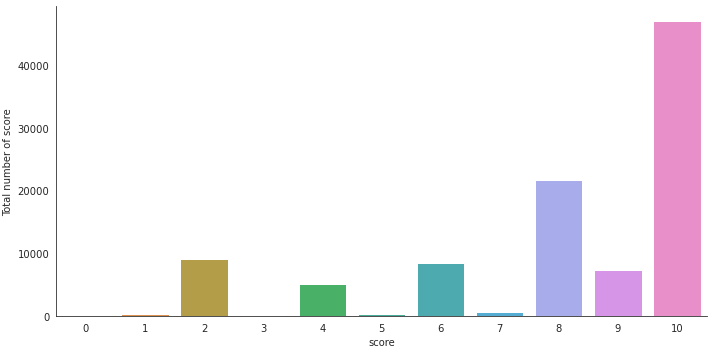

In [38]:
# Check the distribution of ratings 
with sns.axes_style('white'):
    g = sns.factorplot("score", data=sample_df, aspect=2.0,kind='count')
    g.set_ylabels("Total number of score") 

## Ratings Distribution

In [39]:
init_notebook_mode(connected=True)

data = sample_df['score'].value_counts().sort_index(ascending=False)
trace = go.Bar(x = data.index,
               text = ['{:.1f} %'.format(val) for val in (data.values / sample_df.shape[0] * 100)],
               textposition = 'auto',
               textfont = dict(color = '#000000'),
               y = data.values,
               )
# Create layout
layout = dict(title = 'Distribution Of {} Phone-ratings'.format(sample_df.shape[0]),
              xaxis = dict(title = 'Rating'),
              yaxis = dict(title = 'Count'))
# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


We can see that more that 80% of all scorings in the data are 6,7,8, 9 and 10, and very few ratings around 15%-18% are in the lower ratings range.

## Ratings Distribution By Product (Phone)

In [40]:
# Number of ratings per phone
data = sample_df.groupby('product')['score'].count().clip(upper=50)

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Scores',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Scores Per Phone (Clipped at 50)',
                   xaxis = dict(title = 'Number of Scores Per Phone'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)


In [41]:
sample_df.groupby('product')['score'].count().reset_index().sort_values('score', ascending=False)[:10]

,product,score
10203,"Lenovo Vibe K4 Note (White,16GB)",332
10202,"Lenovo Vibe K4 Note (Black, 16GB)",323
14982,"OnePlus 3 (Graphite, 64 GB)",283
14983,"OnePlus 3 (Soft Gold, 64 GB)",249
17570,Samsung Galaxy Express I8730,211
7254,Huawei P8lite zwart / 16 GB,189
10206,"Lenovo Vibe K5 (Gold, VoLTE update)",167
10208,"Lenovo Vibe K5 (Grey, VoLTE update)",158
10192,"Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)",153
19444,Samsung Galaxy S6 zwart / 32 GB,153


## Ratings Distribution By Authors (Users)

In [42]:
# Number of ratings per book
data = sample_df.groupby('author')['score'].count().clip(upper=50)

# Create trace
trace = go.Histogram(x = data.values,
                     name = 'Scores',
                     xbins = dict(start = 0,
                                  end = 50,
                                  size = 2))
# Create layout
layout = go.Layout(title = 'Distribution Of Number of Scores Per User (Clipped at 50)',
                   xaxis = dict(title = 'Number of Scores Per User'),
                   yaxis = dict(title = 'Count'),
                   bargap = 0.2)

# Create plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [43]:
sample_df.groupby('author')['score'].count().reset_index().sort_values('score', ascending=False)[:10]

,author,score
2897,Amazon Customer,9827
8983,Cliente Amazon,1375
52617,e-bit,614
8981,Client d'Amazon,531
2927,Amazon Kunde,304
3899,Anonymous,206
52788,einer Kundin,190
68302,unknown,144
52787,einem Kunden,140
3900,Anonymous,85


Most of the users gave more than 5 ratings, and very few users gave many ratings, although the most productive user have given 9827 ratings.

To reduce the dimensionality of the dataset, we will filter out rarely rated product and rarely rating authors.

In [109]:
# Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset.

min_phone_ratings = 50
filter_products = sample_df['product'].value_counts() > min_phone_ratings
filter_products = filter_products[filter_products].index.tolist()

min_user_ratings = 50
filter_users = sample_df['author'].value_counts() > min_user_ratings
filter_users = filter_users[filter_users].index.tolist()

df_new = sample_df[(sample_df['product'].isin(filter_products)) & (sample_df['author'].isin(filter_users))]
print('The original data frame shape:\t{}'.format(sample_df.shape))
print('The new data frame shape:\t{}'.format(df_new.shape))

The original data frame shape:	(100000, 4)
The new data frame shape:	(2762, 4)


In [45]:
# Get a series object containing the count of unique elements
# in each column of dataframe
uniqueValues = df_new.nunique()
print('Count of unique values in each column :')
print(uniqueValues)

Count of unique values in each column :
score          7
score_max      1
author        18
product      104
dtype: int64


In [46]:
print(Fore.YELLOW + "The total phones are",Style.RESET_ALL,f"{df_new['product'].count()},", Fore.BLUE + "from those the unique types are", Style.RESET_ALL, f"{df_new['product'].value_counts().shape[0]}.")

The total phones are  2762, from those the unique types are  104.


In [47]:
print(Fore.YELLOW + "The total users are",Style.RESET_ALL,f"{df_new['author'].count()},", Fore.BLUE + "from those the unique types are", Style.RESET_ALL, f"{df_new['author'].value_counts().shape[0]}.")

The total users are  2762, from those the unique types are  18.


### Consider only ratings from 1-10 and leave 0s in column `Score`

In [48]:
df_new['score'].unique()

<IntegerArray>
[10, 2, 8, 6, 4, 9, 7]
Length: 7, dtype: Int64

In [49]:
#Hence segragating implicit and explict ratings datasets
ratings_explicit = df_new[df_new.score != 0]
ratings_implicit = df_new[df_new.score == 0]

In [50]:
print(df_new.shape)
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(2762, 4)
(2762, 4)
(0, 4)


In [51]:
# Top 10 users based on rating
most_rated = ratings_explicit.groupby('author').size().sort_values(ascending=False)[:10]
most_rated

author
Amazon Customer       2377
Cliente Amazon         104
einer Kundin            92
einem Kunden            74
Anonymous               42
e-bit                   23
Marco                    7
Amazon Kunde             7
ÐÐ»ÐµÐºÑÐ°Ð½Ð´Ñ       7
ÐÐ½Ð´ÑÐµÐ¹             6
dtype: int64

In [108]:
# Identify the most rated features.
ratings_explicit.groupby('product').size().sort_values(ascending=False)[:10]

product
Lenovo Vibe K4 Note (White,16GB)                                           201
Lenovo Vibe K4 Note (Black, 16GB)                                          194
OnePlus 3 (Soft Gold, 64 GB)                                               123
OnePlus 3 (Graphite, 64 GB)                                                118
Lenovo Vibe K5 (Grey, VoLTE update)                                        104
Lenovo Vibe K5 (Gold, VoLTE update)                                        101
Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)                                86
Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)     82
Lenovo Vibe K5 (Silver, 16GB)                                               69
OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)                                61
dtype: int64

In [52]:
# print(sample_df)
counts = ratings_explicit['author'].value_counts()
df_final = ratings_explicit[ratings_explicit['author'].isin(counts[counts >= 50].index)]

In [53]:
counts1 = pd.value_counts(df_final['author'])
counts1

Amazon Customer    2377
Cliente Amazon      104
einer Kundin         92
einem Kunden         74
Name: author, dtype: int64

In [54]:
df_final = df_final[df_final['author'].isin(counts1[counts1 >= 50].index)]
df_final

,score,score_max,author,product
271105,10,10,Amazon Customer,Nokia E52
34654,10,10,einer Kundin,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol..."
70413,10,10,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)"
116775,10,10,Amazon Customer,"OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)"
53168,2,10,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)"
...,...,...,...,...
76792,2,10,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)"
18019,6,10,Amazon Customer,"Lenovo Vibe K5 (Gold, VoLTE update)"
235845,6,10,Amazon Customer,Nokia 5800 XpressMusic
56772,8,10,Amazon Customer,"Lenovo Vibe K4 Note (White,16GB)"


In [55]:
df_final.head()

,score,score_max,author,product
271105,10,10,Amazon Customer,Nokia E52
34654,10,10,einer Kundin,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol..."
70413,10,10,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)"
116775,10,10,Amazon Customer,"OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)"
53168,2,10,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)"


In [56]:
# ratings_explicit

In [57]:
reader = Reader(rating_scale=(1, 10))

In [58]:
df_final.head(2)

,score,score_max,author,product
271105,10,10,Amazon Customer,Nokia E52
34654,10,10,einer Kundin,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol..."


In [59]:
df_final.shape

(2647, 4)

In [60]:
data = Dataset.load_from_df(df_final[['author', 'product', 'score']], reader)

In [61]:
data.df.head()

,author,product,score
271105,Amazon Customer,Nokia E52,10
34654,einer Kundin,"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zol...",10
70413,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)",10
116775,Amazon Customer,"OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)",10
53168,Amazon Customer,"Lenovo Vibe K4 Note (Black, 16GB)",2


# Popularity Based Recomendation System

In [107]:
# Build a popularity based model and recommend top 5 mobile phones.
pd.DataFrame(round(df_final.groupby('product')['score'].mean(),1).sort_values(ascending=False).head())

,score
product,
"Apple iPhone 5 Unlocked Cellphone, 32GB, Black",10.0
LG GX200,10.0
"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)",9.8
Nokia N82,9.6
"Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G)",9.6


In [ ]:
# this R the top rated products by users ,Here i didnt take count of users

# SVD Based Recommendation System

In [63]:


reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(df_final[['author', 'product', 'score']], reader)

In [64]:
# Split data to train and test

trainset, testset = train_test_split(data, test_size=.25,random_state=123)

In [65]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x0000025604CD6C80>

In [66]:
# However the ids are the inner ids and not the raw ids
# raw ids can be obatined as follows

print(trainset.to_raw_uid(0))
#print(trainset.to_raw_iid(1066))

Amazon Customer


In [67]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)

In [68]:
testset[0]

('Amazon Customer', 'Samsung Galaxy Ace GT-S5830', 8.0)

In [69]:
test_pred = svd_model.test(testset)

In [70]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 2.8735


2.873476379625949

In [71]:
# getting Better Parameters for SVD


param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)

gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

2.804894734911688
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


#  KNNWithMeans Based Recommendation System

In [72]:
knn_model = KNNWithMeans()

In [73]:
knn_model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [74]:
test_pred = knn_model.test(testset)

In [75]:
# compute RMSE
accuracy.rmse(test_pred)

RMSE: 2.8346


2.834573712808361

## NOTE : Some external algo for recommender system for reference 

Just took copy

# =======================================================================================

With the Surprise library, we will benchmark the following algorithms

### Basic algorithms

#### NormalPredictor

* NormalPredictor algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal. This is one of the most basic algorithms that do not do much work.

#### BaselineOnly

* BasiclineOnly algorithm predicts the baseline estimate for given user and item.

### k-NN algorithms

#### KNNBasic

* KNNBasic is a basic collaborative filtering algorithm.

#### KNNWithMeans

* KNNWithMeans is basic collaborative filtering algorithm, taking into account the mean ratings of each user.

#### KNNWithZScore

* KNNWithZScore is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

#### KNNBaseline

* KNNBaseline is a basic collaborative filtering algorithm taking into account a baseline rating.

### Matrix Factorization-based algorithms

#### SVD

* SVD algorithm is equivalent to Probabilistic Matrix Factorization (http://papers.nips.cc/paper/3208-probabilistic-matrix-factorization.pdf)

#### SVDpp

* The SVDpp algorithm is an extension of SVD that takes into account implicit ratings.

#### NMF

* NMF is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.

### Slope One

* Slope One is a straightforward implementation of the SlopeOne algorithm. (https://arxiv.org/abs/cs/0702144)

### Co-clustering

* Co-clustering is a collaborative filtering algorithm based on co-clustering (http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.113.6458&rep=rep1&type=pdf)


We use rmse as our accuracy metric for the predictions.

In [76]:
benchmark = []
# Iterate over all algorithms
for algorithm in [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE','MAE'], cv=3, verbose=False)
    
    # Get results & append algorithm name
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    benchmark.append(tmp)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...


In [77]:
surprise_results = pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

In [78]:
surprise_results

,test_rmse,test_mae,fit_time,test_time
Algorithm,,,,
BaselineOnly,2.793121,2.306359,0.001334,0.005339
KNNBaseline,2.814115,2.274919,0.003667,0.082018
SVD,2.822086,2.294691,0.074345,0.005673
CoClustering,2.827754,2.309841,0.029670,0.004334
KNNWithMeans,2.830993,2.300729,0.003000,0.060780
SlopeOne,2.833089,2.299728,0.058015,0.845013
KNNBasic,2.838287,2.310401,0.003334,0.051678
KNNWithZScore,2.840333,2.306632,0.004001,0.070683
SVDpp,3.015241,2.440952,32.147962,1.063721


In [79]:
best_svd = SVD(n_epochs= 10, lr_all= 0.005, reg_all= 0.4)

In [80]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = best_svd
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

RMSE: 2.7551


2.7551145961922936

In [81]:
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0


In [82]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [83]:
trainset = algo.trainset
print(algo.__class__.__name__)

SVD


In [84]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,Amazon Customer,"Lenovo Vibe K5 (Grey, VoLTE update)",8.0,6.705865,{'was_impossible': False},1791,74,1.294135
1,Amazon Customer,Nokia C3,10.0,8.143036,{'was_impossible': False},1791,13,1.856964
2,Cliente Amazon,"Huawei P9 Lite Smartphone, LTE, Display 5.2'' ...",10.0,8.679481,{'was_impossible': False},73,25,1.320519
3,Amazon Customer,HTC Wildfire S,10.0,8.039386,{'was_impossible': False},1791,18,1.960614
4,Amazon Customer,Samsung Star GT-S5230,10.0,7.978120,{'was_impossible': False},1791,23,2.021880


In [85]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [86]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
463,Amazon Customer,Nokia N8,8.0,7.998337,{'was_impossible': False},1791,15,0.001663
466,Amazon Customer,Nokia 5530 XpressMusic,8.0,7.983072,{'was_impossible': False},1791,20,0.016928
354,Amazon Customer,Nokia 5530 XpressMusic,8.0,7.983072,{'was_impossible': False},1791,20,0.016928
141,Amazon Customer,Samsung Star GT-S5230,8.0,7.978120,{'was_impossible': False},1791,23,0.021880
611,Amazon Customer,Samsung Star GT-S5230,8.0,7.978120,{'was_impossible': False},1791,23,0.021880
214,Amazon Customer,HTC Wildfire S,8.0,8.039386,{'was_impossible': False},1791,18,0.039386
473,Amazon Customer,Nokia N73,8.0,7.934774,{'was_impossible': False},1791,10,0.065226
584,Amazon Customer,Nokia N73,8.0,7.934774,{'was_impossible': False},1791,10,0.065226
430,Amazon Customer,Nokia 5130 XpressMusic,8.0,8.081500,{'was_impossible': False},1791,17,0.081500
137,Amazon Customer,"OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)",8.0,8.122146,{'was_impossible': False},1791,42,0.122146


In [87]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
76,Amazon Customer,Nokia E72,2.0,8.052153,{'was_impossible': False},1791,6,6.052153
476,Amazon Customer,Nokia E72,2.0,8.052153,{'was_impossible': False},1791,6,6.052153
504,Amazon Customer,Nokia 5130 XpressMusic,2.0,8.081500,{'was_impossible': False},1791,17,6.081500
326,Amazon Customer,"OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)",2.0,8.122146,{'was_impossible': False},1791,42,6.122146
320,Amazon Customer,"OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)",2.0,8.122146,{'was_impossible': False},1791,42,6.122146
138,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",2.0,8.278132,{'was_impossible': False},1791,98,6.278132
101,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",2.0,8.278132,{'was_impossible': False},1791,98,6.278132
392,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)",2.0,8.508279,{'was_impossible': False},1791,95,6.508279
312,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)",2.0,8.508279,{'was_impossible': False},1791,95,6.508279
177,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)",2.0,8.508279,{'was_impossible': False},1791,95,6.508279


In [88]:
def precision_recall_at_k(predictions, k=20, threshold=3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended phone that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant phone that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


In [89]:
kf = KFold(n_splits=20)
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=20, threshold=4)

    # Precision and recall can then be averaged over all users
    print('Precision :',sum(prec for prec in precisions.values()) / len(precisions))
    print('Recall :',sum(rec for rec in recalls.values()) / len(recalls))

Precision : 0.9875
Recall : 0.7970297029702971


Precision : 0.9125
Recall : 0.7949999999999999


Precision : 0.95
Recall : 0.7963917525773196


Precision : 0.9875
Recall : 0.7994791666666667


Precision : 0.9875
Recall : 0.7989690721649485


Precision : 0.9375
Recall : 0.8015463917525774


Precision : 0.9875
Recall : 0.7927927927927928


Precision : 0.9875
Recall : 0.7989690721649485


Precision : 1.0
Recall : 0.8026315789473684


Precision : 0.9875
Recall : 0.8021978021978022


Precision : 0.9375
Recall : 0.7976190476190477


Precision : 0.9625
Recall : 0.7920792079207921


Precision : 0.95
Recall : 0.7912371134020619


Precision : 0.975
Recall : 0.7978723404255319


Precision : 1.0
Recall : 0.7995049504950495


Precision : 0.9625
Recall : 0.7933673469387755


Precision : 0.9319444444444445
Recall : 0.8010752688172043


Precision : 0.9875
Recall : 0.8


Precision : 0.95
Recall : 0.7904040404040404


Precision : 1.0
Recall : 0.7954545454545454


In [90]:
def get_top_n(predictions, n=20):
    """Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    """

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [91]:
# First train an  algorithm on the smartphone dataset.
trainset = data.build_full_trainset()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=20)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print("***********************************************************************************************************\n",
          uid,
          "\n-------------------------------------------------------------------------------------------------------\n", 
          [iid for (iid, _) in user_ratings])
    print('============================================================================================\n')

***********************************************************************************************************
 Amazon Customer 
-------------------------------------------------------------------------------------------------------
 ['Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G)', 'Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Motorola Moto G (3Âª GeneraciÃ³n) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla 5", cÃ¡mara 13 Mp, 16 GB, Quad Core 1.4 GHz, 2 GB de RAM), negro', 'Alcatel One Touch 20-04G Telefono Cellulare, Nero', 'Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia]']

*******

# Going With BaseLineOnly

BaselineOnly algorithm gave us the best rmse, therefore, we will proceed further with BaselineOnly and use Alternating Least Squares (ALS).

In [92]:
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }
algo = BaselineOnly(bsl_options=bsl_options)
cross_validate(algo, data, measures=['RMSE','MAE'], cv=3, verbose=False)

Using ALS
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([2.79768995, 2.85573717, 2.73699736]),
 'test_mae': array([2.28393112, 2.34069611, 2.26585055]),
 'fit_time': (0.0010008811950683594,
  0.0010006427764892578,
  0.0010008811950683594),
 'test_time': (0.004000186920166016,
  0.0050008296966552734,
  0.003998994827270508)}

We use the train_test_split() to sample a trainset and a testset with given sizes, and use the accuracy metric of rmse. We’ll then use the fit() method which will train the algorithm on the trainset, and the test() method which will return the predictions made from the testset

In [93]:
trainset, testset = train_test_split(data, test_size=0.25)
algo = BaselineOnly(bsl_options=bsl_options)
predictions = algo.fit(trainset).test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
RMSE: 2.7689


2.768936342483558

In [94]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [95]:
trainset = algo.trainset
print(algo.__class__.__name__)

BaselineOnly


In [96]:
df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df['Iu'] = df.uid.apply(get_Iu)
df['Ui'] = df.iid.apply(get_Ui)
df['err'] = abs(df.est - df.rui)

In [97]:
df.head()

,uid,iid,rui,est,details,Iu,Ui,err
0,Amazon Customer,"Motorola Moto G 3rd Generation (Black, 8GB)",10.0,6.974499,{'was_impossible': False},1795,30,3.025501
1,Amazon Customer,Samsung Galaxy Ace GT-S5830,6.0,6.472372,{'was_impossible': False},1795,12,0.472372
2,Amazon Customer,"OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)",10.0,8.343806,{'was_impossible': False},1795,42,1.656194
3,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",8.0,8.541463,{'was_impossible': False},1795,88,0.541463
4,Amazon Customer,"Apple iPhone 5s (Silver, 16GB)",8.0,7.676887,{'was_impossible': False},1795,44,0.323113


In [98]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [99]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
584,Amazon Customer,Samsung B5722,8.0,7.998968,{'was_impossible': False},1795,3,0.001032
236,Amazon Customer,"Lenovo Vibe X3 (White, 32GB)",8.0,8.002913,{'was_impossible': False},1795,26,0.002913
23,Amazon Customer,"Lenovo Vibe X3 (White, 32GB)",8.0,8.002913,{'was_impossible': False},1795,26,0.002913
324,Amazon Customer,"Lenovo Vibe X3 (White, 32GB)",8.0,8.002913,{'was_impossible': False},1795,26,0.002913
160,Amazon Customer,"OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)",8.0,8.043435,{'was_impossible': False},1795,45,0.043435
474,Amazon Customer,"OnePlus 3T (Gunmetal, 6GB RAM + 64GB memory)",8.0,8.043435,{'was_impossible': False},1795,45,0.043435
498,Cliente Amazon,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",8.0,7.936728,{'was_impossible': False},70,19,0.063272
404,Cliente Amazon,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",8.0,7.936728,{'was_impossible': False},70,19,0.063272
619,Cliente Amazon,"Huawei P8 Lite Smartphone, Display 5"" IPS, Pro...",8.0,7.936728,{'was_impossible': False},70,19,0.063272
131,Amazon Customer,Nokia N73,8.0,8.144104,{'was_impossible': False},1795,9,0.144104


The above are the best predictions, and they are not lucky guesses. Because Ui is anywhere between 25 to 148, they are not really small, meaning that significant number of users have rated the target product.

In [100]:
worst_predictions

,uid,iid,rui,est,details,Iu,Ui,err
504,Amazon Customer,"OnePlus 3T (Soft Gold, 6GB RAM + 64GB memory)",2.0,8.343806,{'was_impossible': False},1795,42,6.343806
431,Amazon Customer,"OnePlus 3 (Soft Gold, 64 GB)",2.0,8.537146,{'was_impossible': False},1795,85,6.537146
594,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",2.0,8.541463,{'was_impossible': False},1795,88,6.541463
620,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",2.0,8.541463,{'was_impossible': False},1795,88,6.541463
203,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",2.0,8.541463,{'was_impossible': False},1795,88,6.541463
457,Amazon Customer,"OnePlus 3 (Graphite, 64 GB)",2.0,8.541463,{'was_impossible': False},1795,88,6.541463
449,Cliente Amazon,Motorola Moto G (3Âª GeneraciÃ³n) + Carcasa Of...,2.0,8.643155,{'was_impossible': False},70,11,6.643155
623,Amazon Customer,Nokia E52,2.0,8.668116,{'was_impossible': False},1795,10,6.668116
388,Amazon Customer,Nokia Lumia 800,2.0,8.834074,{'was_impossible': False},1795,7,6.834074
621,Amazon Customer,Nokia Lumia 800,2.0,8.834074,{'was_impossible': False},1795,7,6.834074


The worst predictions look pretty surprise. Let's look in more details of the First Product "OnePlus X (Onyx, 16GB)", the product was rated by 28 users, user "Amazon Customer" rated 2, our BaselineOnly algorithm predicts 8.30.

In [101]:
df_new.loc[df_new['product'] == 'OnePlus X (Onyx, 16GB)']['score'].describe()

count    40.000000
mean      7.800000
std       2.997435
min       2.000000
25%       8.000000
50%       9.000000
75%      10.000000
max      10.000000
Name: score, dtype: float64

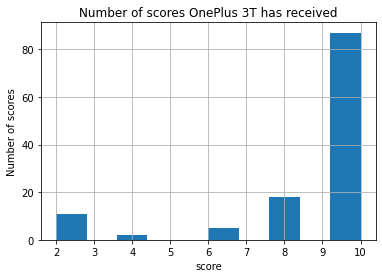

In [102]:
df_new.loc[df_new['product'] == 'OnePlus 3 (Soft Gold, 64 GB)']['score'].hist()
plt.xlabel('score')
plt.ylabel('Number of scores')
plt.title('Number of scores OnePlus 3T has received')
plt.show();

It turns out, most of the ratings this product received was between [6-10], in another word, most of the users in the data rated this phone [6-10], only very few users rated 2. Same with the other predictions in "worst predictions" list.

## Checking the Phone relevance and recommendation

**Precision@k = Recommended items that are relevant/Recommended items**

**Recall@k= Recommended items that are relevant/Relevant items**

_Precision at k is the proportion of recommended items in the top-k set that are relevant_

Its interpretation is as follows. Suppose that my precision at 10 in a top-10 recommendation problem is 80%. This means that 80% of the recommendation I make are relevant to the user.


_Recall at k is the proportion of relevant items found in the top-k recommendations_

Suppose that we computed recall at 10 and found it is 40% in our top-10 recommendation system. This means that 40% of the total number of the relevant items appear in the top-k results.

An item is considered relevant if its true rating rui is greater than a given threshold. An item is considered recommended if its estimated rating r^ui is greater than the threshold, and if it is among the k highest estimated ratings.

In [103]:
kf = KFold(n_splits=20)
for trainset, testset in kf.split(data):
    algo.fit(trainset)
    predictions = algo.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=20, threshold=4)

    # Precision and recall can then be averaged over all users
    print('Precision :',sum(prec for prec in precisions.values()) / len(precisions))
    print('Recall :',sum(rec for rec in recalls.values()) / len(recalls))

Estimating biases using als...


Precision : 0.975
Recall : 0.7924528301886793
Estimating biases using als...


Precision : 1.0
Recall : 0.7980769230769231
Estimating biases using als...


Precision : 0.975
Recall : 0.7978723404255319
Estimating biases using als...


Precision : 0.9722222222222222
Recall : 0.7985436893203883
Estimating biases using als...


Precision : 0.9875
Recall : 0.798469387755102
Estimating biases using als...


Precision : 0.9875
Recall : 0.794392523364486
Estimating biases using als...


Precision : 0.975
Recall : 0.7978723404255319
Estimating biases using als...


Precision : 0.8916666666666666
Recall : 0.7983870967741935
Estimating biases using als...


Precision : 0.925
Recall : 0.7949999999999999
Estimating biases using als...


Precision : 0.975
Recall : 0.7978723404255319
Estimating biases using als...


Precision : 0.9125
Recall : 0.7945544554455446
Estimating biases using als...


Precision : 0.9625
Recall : 0.7938144329896908
Estimating biases using als...


Precision : 0.9875
Recall : 0.7956730769230769
Estimating biases using als...


Precision : 0.975
Recall : 0.7973684210526315
Estimating biases using als...


Precision : 1.0
Recall : 0.7333333333333334
Estimating biases using als...


Precision : 1.0
Recall : 0.7980769230769231
Estimating biases using als...


Precision : 0.9500000000000001
Recall : 0.7263157894736842
Estimating biases using als...


Precision : 0.975
Recall : 0.7936893203883495
Estimating biases using als...


Precision : 0.95625
Recall : 0.8039772727272727
Estimating biases using als...


Precision : 0.9625
Recall : 0.7947368421052632


In [104]:
# First train an BaselineOnly algorithm on the smartphone dataset.
trainset = data.build_full_trainset()
algo.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo.test(testset)

top_n = get_top_n(predictions, n=20)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print("***********************************************************************************************************\n",
          uid,
          "\n-------------------------------------------------------------------------------------------------------\n", 
          [iid for (iid, _) in user_ratings])
    print('============================================================================================\n')

Estimating biases using als...


***********************************************************************************************************
 Amazon Customer 
-------------------------------------------------------------------------------------------------------
 ['Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,5 Zoll) Display, LTE (4G)', 'Samsung Galaxy S7 Smartphone, 12,9 cm (5,1 Zoll) Display, LTE (4G)', 'Samsung Galaxy A3 (2016) - A310F Smartphone, 12 cm (4,7 Zoll) Display, LTE (4G)', 'Huawei P8 lite Smartphone, Display 5.0" IPS, Dual Sim, Processore Octa-Core, Memoria 16 GB, Fotocamera 13 MP, Android 5.0, Bianco', 'Motorola Moto G (3Âª GeneraciÃ³n) + Carcasa Oficial color turquesa - Smartphone libre Android 6 (4G, pantalla 5", cÃ¡mara 13 Mp, 16 GB, Quad Core 1.4 GHz, 2 GB de RAM), negro', 'Alcatel One Touch 20-04G Telefono Cellulare, Nero', 'Huawei P8 Lite Smartphone, Display 5" IPS, Processore Octa-Core 1.5 GHz, Memoria Interna da 16 GB, 2 GB RAM, Fotocamera 13 MP, monoSIM, Android 5.0, Bianco [Italia]']

*******

<b>Summarise the insights.</b>

1. Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information.

2. BaseLineOnly is has better Rmse Score when compared to others
3. builded two RS using SVD and BaseLineOnlyy

<b>Question : In what business scenario you should use popularity based Recommendation Systems ? </b><br>

As the name suggests it recommends based on what is currently popular. This is particularly useful when you don't have past data as a reference to recommend product to the user.

<b>Question : In what business scenario you should use Collaborative filtering Recommendation Systems ? </b><br>

Collaborative filtering works around the interactions that users have with items. These interactions can help find patterns that the data about the items or users itself can’t. Here are some points that can help you decide if collaborative filtering can be used:

1. Collaborative filtering doesn’t require features about the items or users to be known. It is suited for a set of different types of items, for example, a supermarket’s inventory where items of various categories can be added. In a set of similar items such as that of a bookstore, though, known features like writers and genres can be useful and might benefit from content-based or hybrid approaches.

2. Collaborative filtering can help recommenders to not overspecialize in a user’s profile and recommend items that are completely different from what they have seen before. If you want your recommender to not suggest a pair of sneakers to someone who just bought another similar pair of sneakers, then try to add collaborative filtering to your recommender spell.

Although collaborative Filtering is very commonly used in recommenders, some of the challenges that are faced while using it are the following:

1. Collaborative filtering can lead to some problems like cold start for new items that are added to the list. Until someone rates them, they don’t get recommended.

2. Data sparsity can affect the quality of user-based recommenders and also add to the cold start problem mentioned above.

3. Scaling can be a challenge for growing datasets as the complexity can become too large. Item-based recommenders are faster than user-based when the dataset is large.

4. With a straightforward implementation, you might observe that the recommendations tend to be already popular, and the items from the long tail section might get ignored.

With every type of recommender algorithm having its own list of pros and cons, it’s usually a hybrid recommender that comes to the rescue. The benefits of multiple algorithms working together or in a pipeline can help you set up more accurate recommenders. In fact, the solution of the winner of the Netflix prize was also a complex mix of multiple algorithms.